# Reno, Nevada Analysis

In [5]:
import folium

# Create folium map
my_map = folium.Map(location=[39.5296, -119.8138], zoom_start=10)
folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', 
                 name='World Imagery', attr='Esri', overlay=False, control=False).add_to(my_map)

# add a transparent radius circle to the center of Reno
folium.Circle(
    location=[39.5296, -119.8138],
    radius=10000,
    color='crimson',
    fill=False,
    fill_color='crimson',
    fill_opacity=0.2,
    opacity=0.5,
    weight=1,
    tooltip='Reno, NV'
).add_to(my_map)

my_map


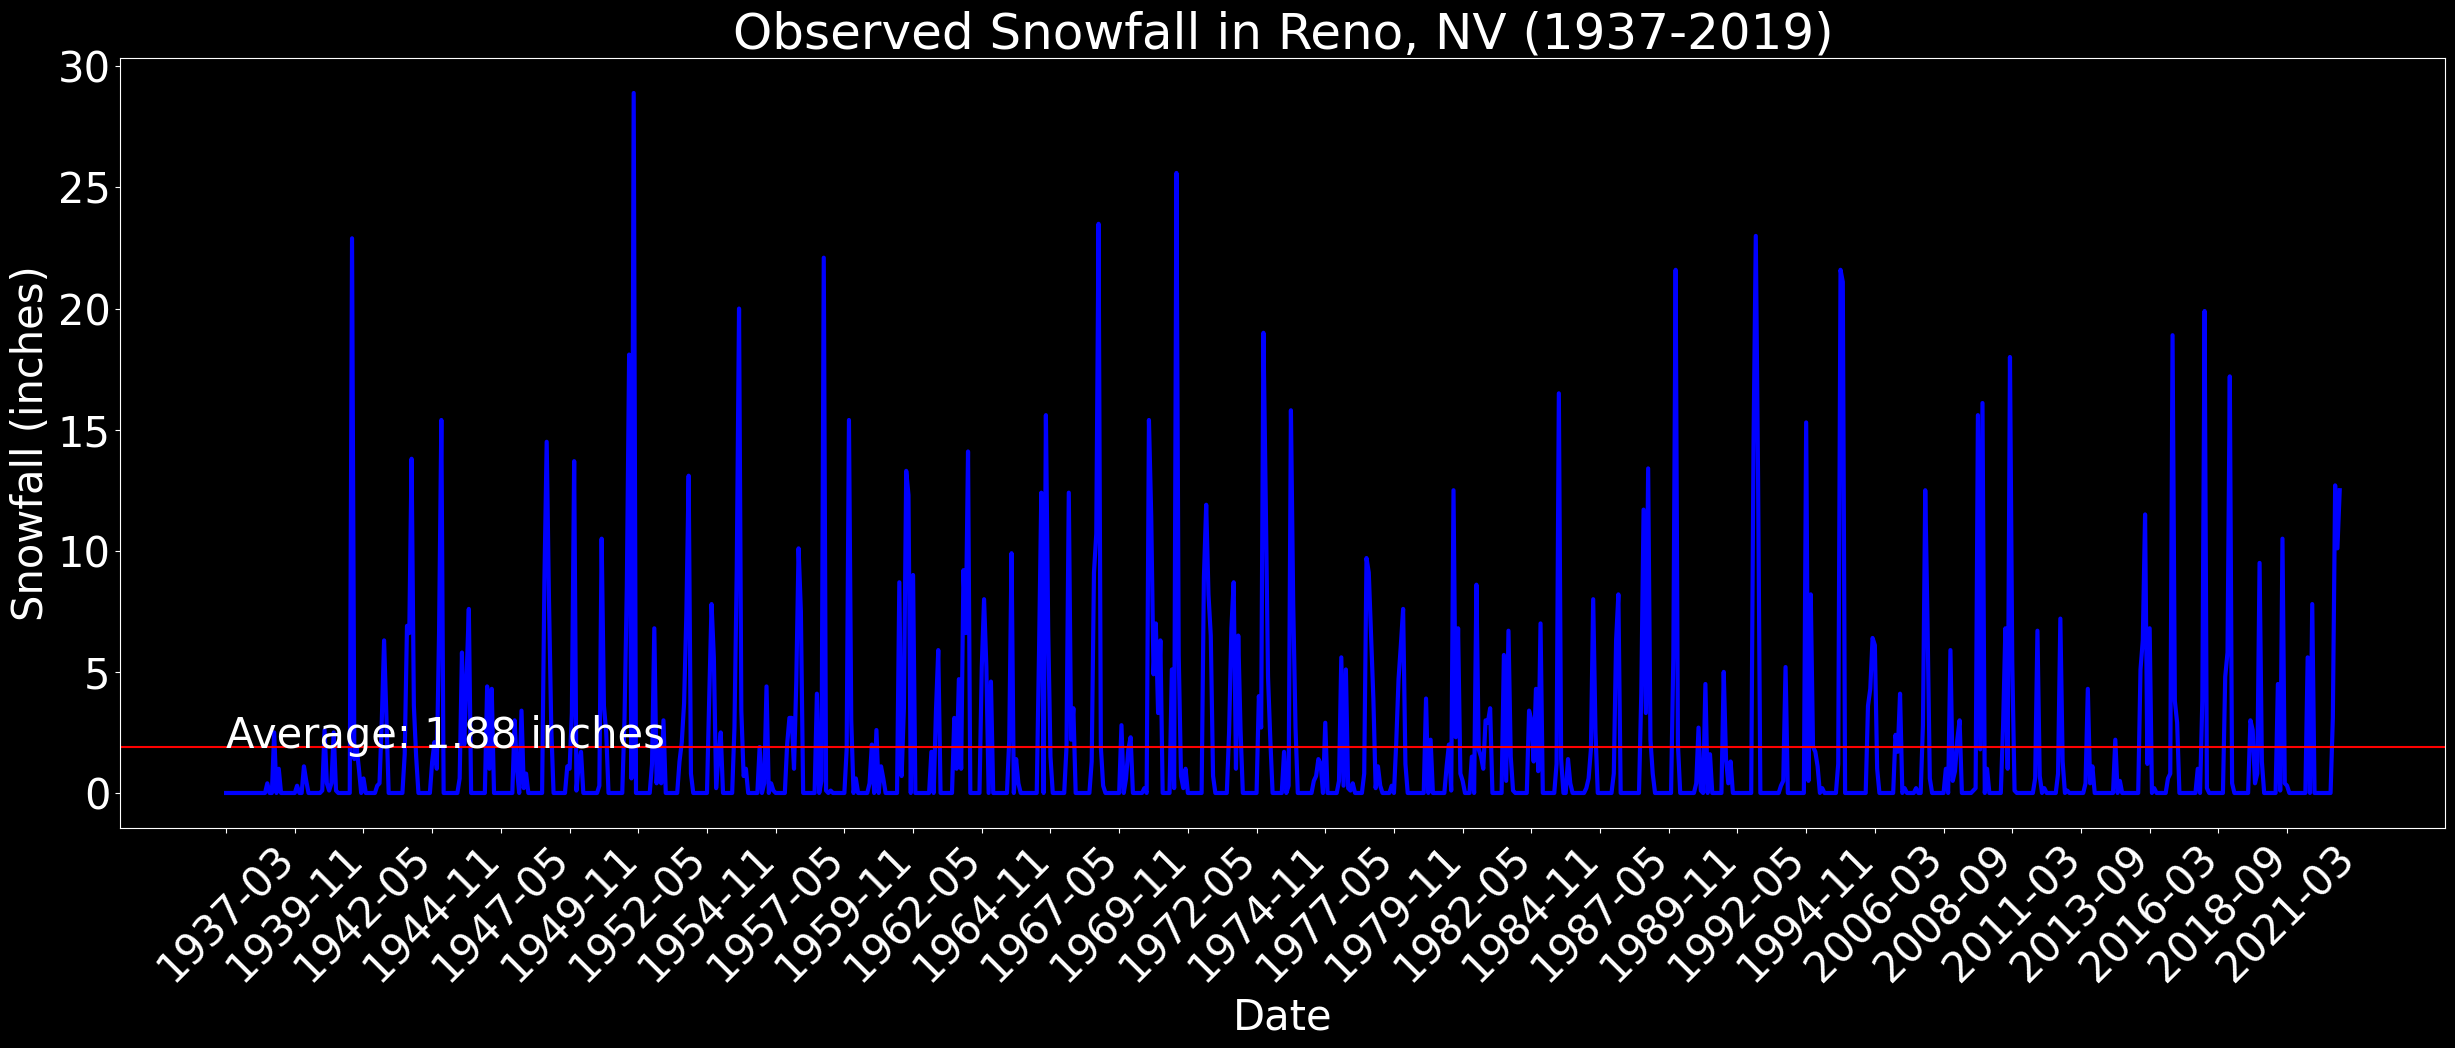

In [34]:
# import a csv file that contains snowfall data 
import pandas as pd
import matplotlib.pyplot as plt

# import the .csv file
df = pd.read_csv('snow-data.csv')

# drop any rows that have NaN values
df = df.dropna()

# plot the data with a horizontal bar graph showing the temporal trend
plt.plot(df['DATE'], df['SNOW'], color='blue', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Snowfall (inches)')
plt.title('Observed Snowfall in Reno, NV (1937-2019)')

# show the dates every 30 days
plt.xticks(df['DATE'][::30])

# decrease the font size of all labels
plt.rcParams.update({'font.size': 30})

# increase the width of the graph
plt.rcParams['figure.figsize'] = [30, 10]

# add a average line
plt.axhline(y=df['SNOW'].mean(), color='r', linestyle='-')

# label the average line and include the average value
plt.text(0, df['SNOW'].mean(), 'Average: ' + str(round(df['SNOW'].mean(), 2)) + ' inches', fontsize=30)

# rotate the x axis labels so they are easier to read
plt.xticks(rotation=45)

plt.show()

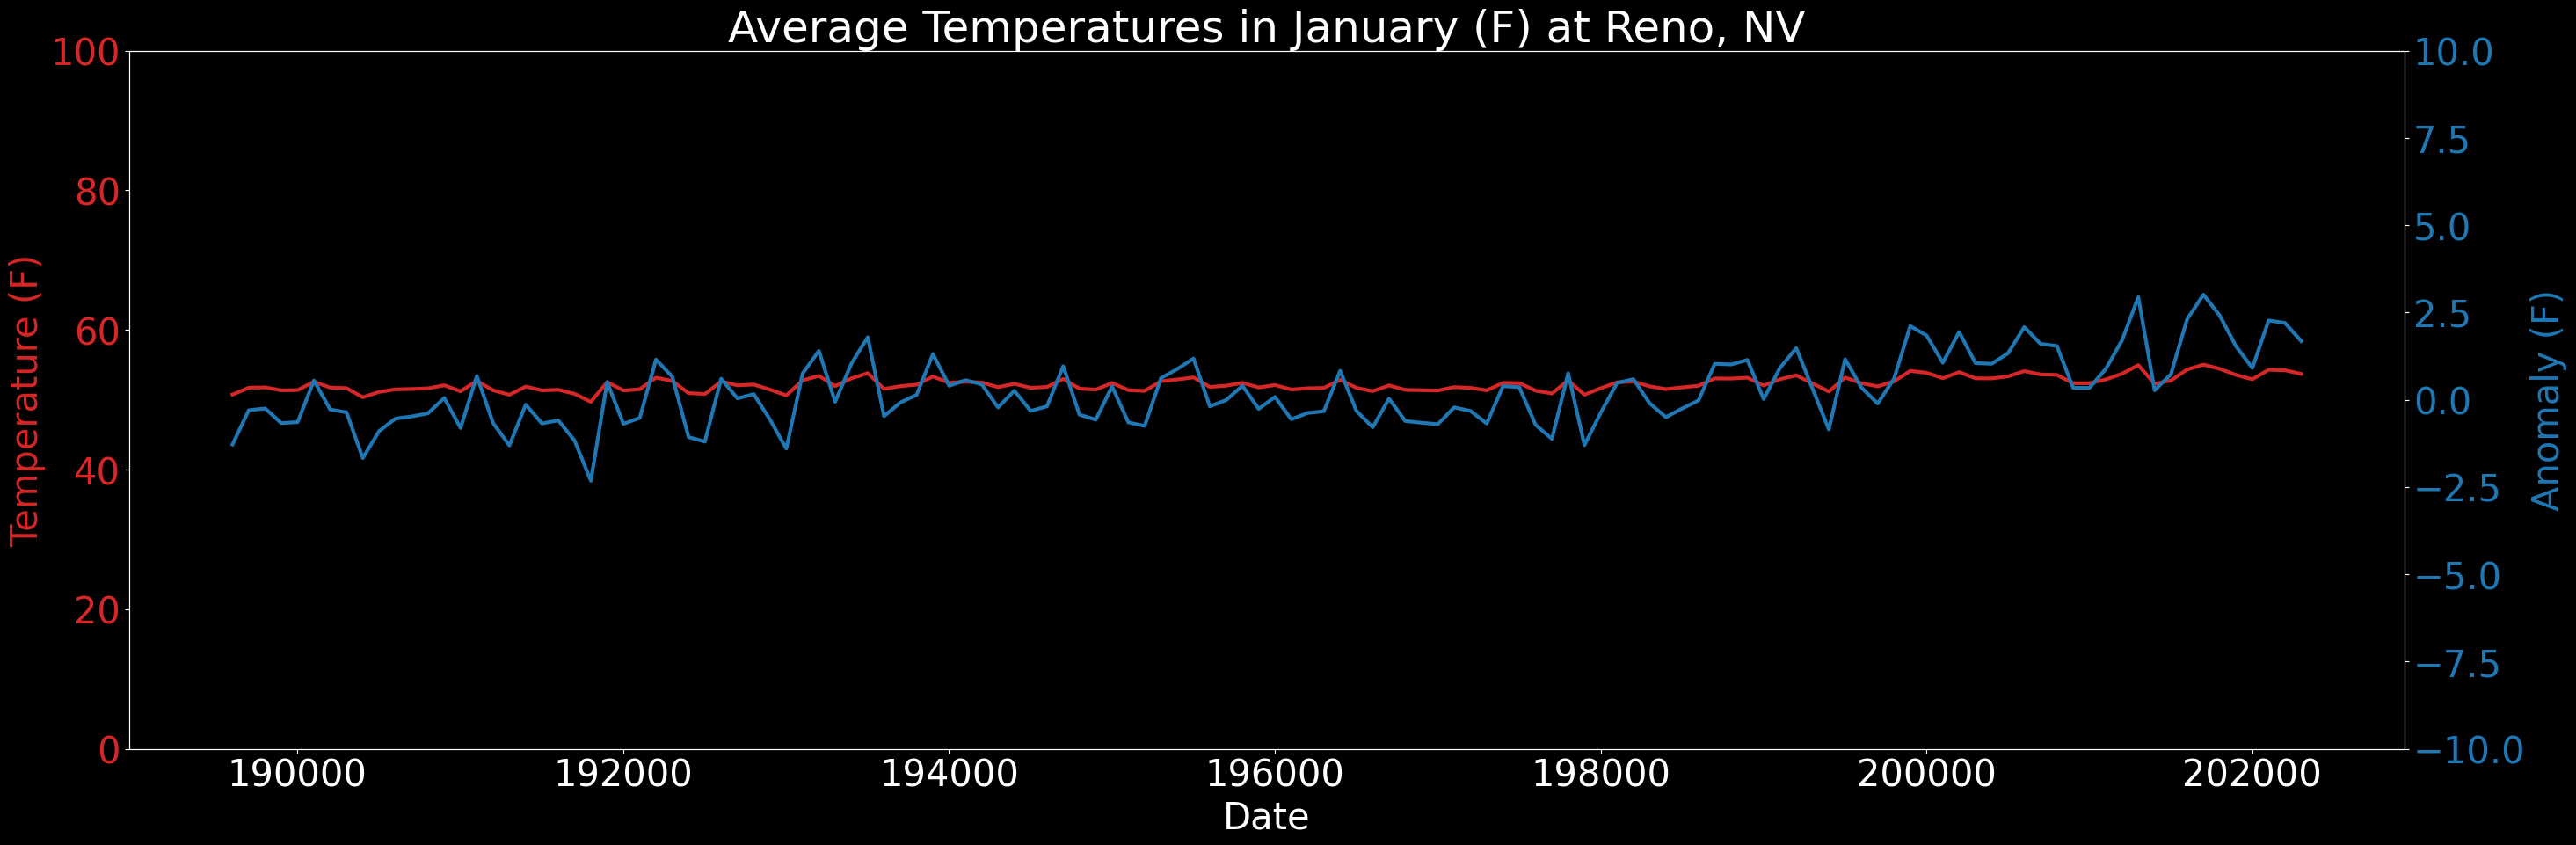

In [39]:
# import a csv file that contains snowfall data 
import pandas as pd
import matplotlib.pyplot as plt

df_temp = pd.read_csv('reno-avg-temp.csv')

temp = df_temp['Value']
jan_date = df_temp['Date']
anomaly = df_temp['Anomaly']


# plot the anomaly data and temp on the same graph
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (F)', color=color)
ax1.plot(jan_date, temp, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Anomaly (F)', color=color)  # we already handled the x-label with ax1
ax2.plot(jan_date, anomaly, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-10, 10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Temperatures in January (F) at Reno, NV')
plt.xticks(rotation=45)
plt.show()

# increase the width of the graph
plt.rcParams['figure.figsize'] = [30, 10]



